In [136]:
import networkx as nx
import plotly.graph_objects as go


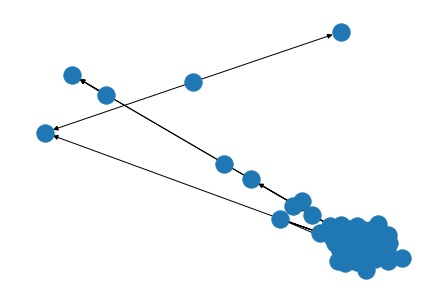

In [172]:
G = nx.scale_free_graph(50)
nx.draw(G)

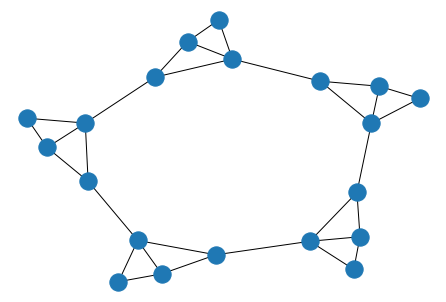

In [96]:
nx.draw(nx.connected_caveman_graph(l=5, k =4))

In [120]:
graph_matrix = nx.to_numpy_matrix((nx.caveman_graph(l=3, k =7)))

In [128]:
def add_hub(graph):
    graph_matrix = nx.to_numpy_matrix(graph)
    graph_matrix = np.append(graph_matrix, np.full((graph_matrix.shape[0],1), 1.0), axis=1)
    graph_matrix = np.append(graph_matrix, np.full((1, graph_matrix.shape[1]), 1.0), axis=0)
    
    return nx.from_numpy_matrix(graph_matrix)

def make_caveman_with_hub(l, k):
    graph = nx.caveman_graph(l=l, k =k)
    graph = add_hub(graph)
    
    return graph

In [163]:
G = make_caveman_with_hub(10, 3)
pos = nx.spectral_layout(G)

In [173]:
G = nx.scale_free_graph(50)
pos = nx.spectral_layout(G)

In [175]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [176]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [177]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()